# 18 - Support Vector Machines

by [Alejandro Correa Bahnsen](albahnsen.com/)

Previously we introduced supervised machine learning.
There are many supervised learning algorithms available; here we'll go into brief detail one of the most powerful and interesting methods: **Support Vector Machines (SVMs)**.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('fivethirtyeight')

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

Let's show a quick example of support vector classification. First we need to create a dataset:

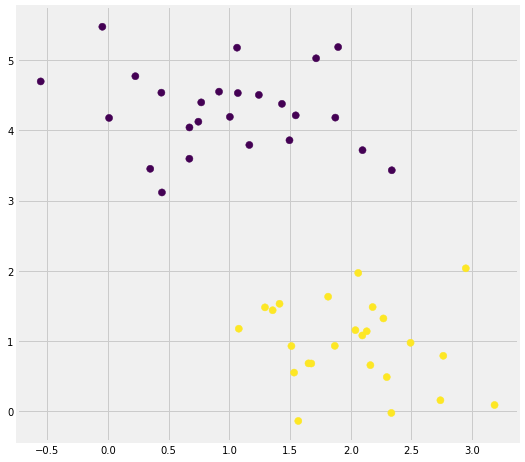

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

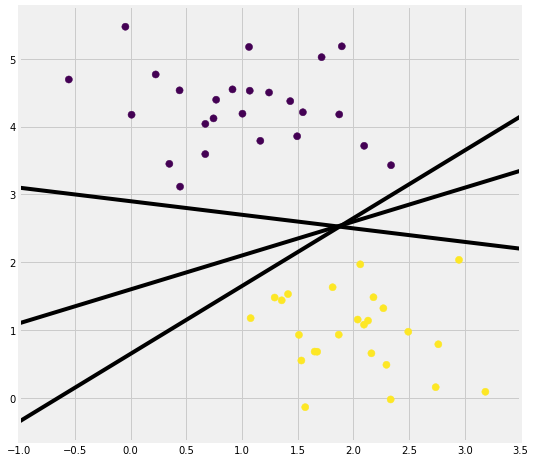

In [3]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

### Support Vector Machines: Maximizing the *Margin*

Support vector machines are one way to address this.
What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.  Here's an example of what it might look like:

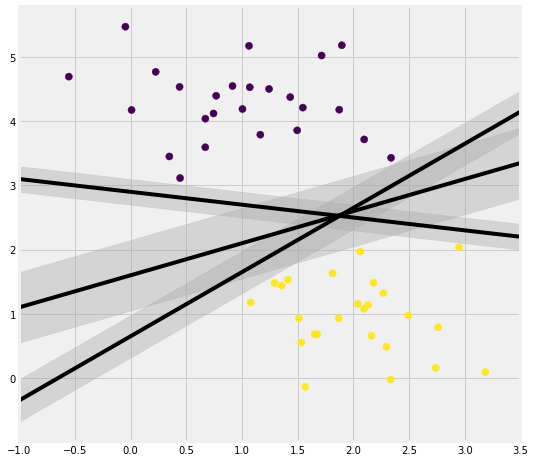

In [4]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

#### Fitting a Support Vector Machine

Now we'll fit a Support Vector Machine Classifier to these points. While the mathematical details of the likelihood model are interesting, we'll let you read about those elsewhere. Instead, we'll just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

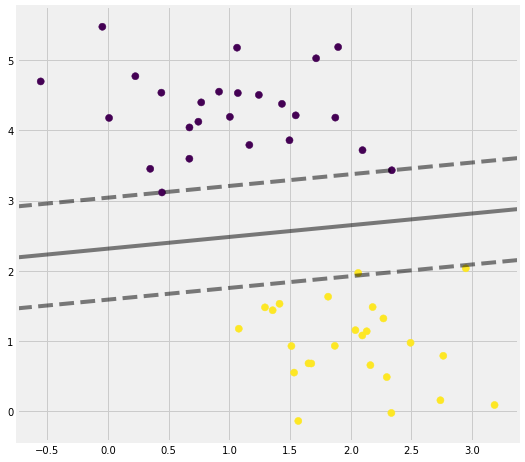

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

In [10]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

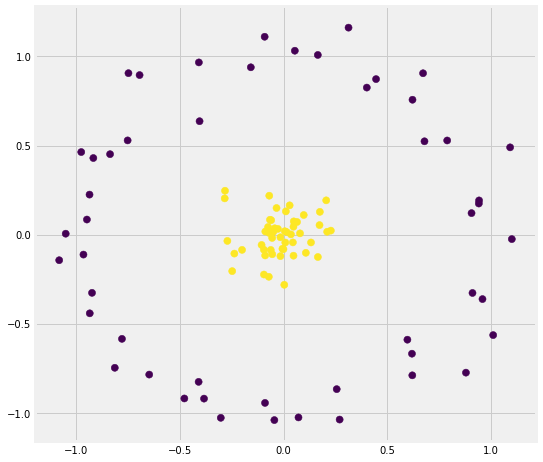

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
# plot_svc_decision_function(clf);

Clearly, no linear discrimination will ever separate these data.
One way we can adjust this is to apply a **kernel**, which is some functional transformation of the input data.

For example, one simple model we could use is a **radial basis function**

In [12]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

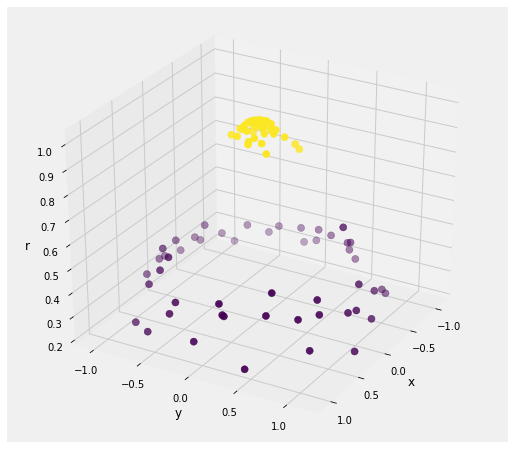

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    plt.figure(figsize=(8,8))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

#interact(plot_3D, elev=[-90, 90], azip=(-180, 180));
plot_3D()

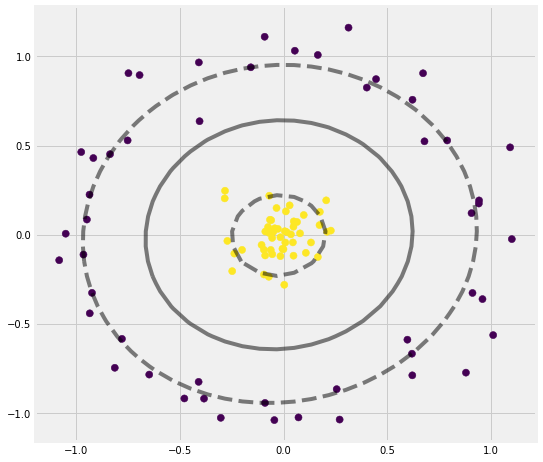

In [14]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)

Here there are effectively $N$ basis functions: one centered at each point! Through a clever mathematical trick, this computation proceeds very efficiently using the "Kernel Trick", without actually constructing the matrix of kernel evaluations.
